# Assignments

* DAAG: Chapter 1 (from page 38), exercises 4, 6, 11, 12, 13, 15, 17, 20.
* CS: Chapter 1 (from page 17), exercises 1.1, 1.2, 1.6, 1.8, 1.9.


Installing and loading DAAG package, from the book source.

In [12]:
if (!require("pacman")) install.packages("pacman")  #pacman is a package manager
pacman::p_load("DAAG")  #load library if not loaded, install if not installed
pacman::p_load("dplyr") 

In [23]:
install.packages("dplyr")

Installing package into ‘/home/andrea/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
also installing the dependencies ‘pillar’, ‘Rcpp’, ‘rlang’, ‘tibble’, ‘tidyselect’



## Exercise 4

For the data frame ais (DAAG package)

(a) Use the function str() to get information on each of the columns. Determine whether
any of the columns hold missing values.

In [9]:
# ais already in namespace

str(ais)

'data.frame':	202 obs. of  13 variables:
 $ rcc   : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc   : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc    : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg    : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ ferr  : num  60 68 21 69 29 42 73 44 41 44 ...
 $ bmi   : num  20.6 20.7 21.9 21.9 19 ...
 $ ssf   : num  109.1 102.8 104.6 126.4 80.3 ...
 $ pcBfat: num  19.8 21.3 19.9 23.7 17.6 ...
 $ lbm   : num  63.3 58.5 55.4 57.2 53.2 ...
 $ ht    : num  196 190 178 185 185 ...
 $ wt    : num  78.9 74.4 69.1 74.9 64.6 63.7 75.2 62.3 66.5 62.9 ...
 $ sex   : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ sport : Factor w/ 10 levels "B_Ball","Field",..: 1 1 1 1 1 1 1 1 1 1 ...


Determine if there are missing values: `is.na()` returns a boolean mask of missing values. `sum` will consider `TRUE = 1, FALSE = 0`, and hence return the number of missing values. Another way to do that is use `summary()`.

In [72]:
sum(is.na(ais))  #number of missing values =

[1] 0

There are no missing values.

In [8]:
summary(ais)

      rcc             wcc               hc              hg       
 Min.   :3.800   Min.   : 3.300   Min.   :35.90   Min.   :11.60  
 1st Qu.:4.372   1st Qu.: 5.900   1st Qu.:40.60   1st Qu.:13.50  
 Median :4.755   Median : 6.850   Median :43.50   Median :14.70  
 Mean   :4.719   Mean   : 7.109   Mean   :43.09   Mean   :14.57  
 3rd Qu.:5.030   3rd Qu.: 8.275   3rd Qu.:45.58   3rd Qu.:15.57  
 Max.   :6.720   Max.   :14.300   Max.   :59.70   Max.   :19.20  
                                                                 
      ferr             bmi             ssf             pcBfat      
 Min.   :  8.00   Min.   :16.75   Min.   : 28.00   Min.   : 5.630  
 1st Qu.: 41.25   1st Qu.:21.08   1st Qu.: 43.85   1st Qu.: 8.545  
 Median : 65.50   Median :22.72   Median : 58.60   Median :11.650  
 Mean   : 76.88   Mean   :22.96   Mean   : 69.02   Mean   :13.507  
 3rd Qu.: 97.00   3rd Qu.:24.46   3rd Qu.: 90.35   3rd Qu.:18.080  
 Max.   :234.00   Max.   :34.42   Max.   :200.80   Max.   :35.52

(b) Make a table that shows the numbers of males and females for each different sport. In
which sports is there a large imbalance (e.g., by a factor of more than 2:1) in the numbers
of the two sexes?

In [74]:
ais %>% 
    group_by(sport) %>%
    summarise(f = sum(sex=="f"), 
              m = sum(sex=="m"), 
              inbalanced = (ifelse(
                  (  (2*sum(sex=="f")<sum(sex=="m"))  | (sum(sex=="f")>2*sum(sex=="m")) ) , # is sex imbalanced?
                  T, #if true
                  F   #if false
                  )
              )
    )

sport,f,m,inbalanced
B_Ball,13,12,FALSE
Field,7,12,FALSE
Gym,4,0,TRUE
Netball,23,0,TRUE
Row,22,15,FALSE
Swim,9,13,FALSE
T_400m,11,18,FALSE
T_Sprnt,4,11,TRUE
Tennis,7,4,FALSE
W_Polo,0,17,TRUE


## Exercise 6

Create a data frame called Manitoba.lakes that contains the lake’s elevation (in meters
above sea level) and area (in square kilometers) as listed below. Assign the names of the lakes using the row.names() function.


In [1]:
#data
region <- c ("Winnipeg", "Winnipegosis", "Manitoba", "SouthernIndian", "Cedar" , "Island", "Gods", "Cross" ,"Playgreen")
elevation <- c(217, 254, 248, 254, 253, 227, 178,207, 217)
area <- c(24387, 5374, 4624, 2247, 1353, 1223, 1151, 755, 657)

#create df
Manitoba.lakes <- data.frame(elevation, area)

#assign labels
row.names(Manitoba.lakes) = region

In [2]:
Manitoba.lakes

,elevation,area
Winnipeg,217,24387
Winnipegosis,254,5374
Manitoba,248,4624
SouthernIndian,254,2247
Cedar,253,1353
Island,227,1223
Gods,178,1151
Cross,207,755
Playgreen,217,657


a) Use the following code to plot log2(area) versus elevation, adding labeling infor-
mation (there is an extreme value of area that makes a logarithmic scale pretty much
essential).
Devise captions that explain the labeling on the points and on the y-axis. It will be necessary
to explain how distances on the scale relate to changes in area.

The following objects are masked _by_ .GlobalEnv:

    area, elevation

The following objects are masked from Manitoba.lakes (pos = 3):

    area, elevation



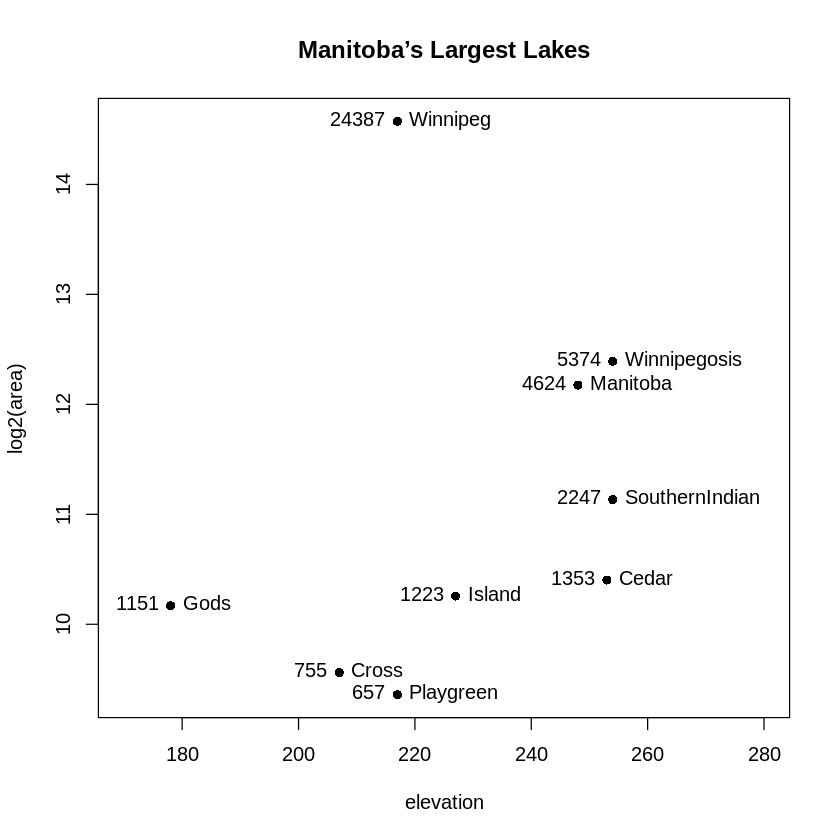

In [11]:
attach(Manitoba.lakes)
plot(log2(area) ~ elevation, pch=16, xlim=c(170,280))
# NB: Doubling the area increases log2(area) by 1.0
text(log2(area) ~ elevation,labels=row.names(Manitoba.lakes), pos=4)
text(log2(area) ~ elevation, labels=area, pos=2)  #removed for readability, reinclude if forced by assignment
title("Manitoba’s Largest Lakes")
detach(Manitoba.lakes)

 Elevation and log2(area) of Manitoba Largest Lakes. y axis has logaritmic scale, so an increase of 1 unit on the axis corresponds to a doubling in lake size.

Repeat the plot and associated labeling, now plotting area versus elevation, but
specifying log="y" in order to obtain a logarithmic y-scale. [Note: The log="y"
setting carries across to the subsequent text() commands. See Subsection 2.1.5 for an
example.]

The following objects are masked _by_ .GlobalEnv:

    area, elevation

The following objects are masked from Manitoba.lakes (pos = 3):

    area, elevation



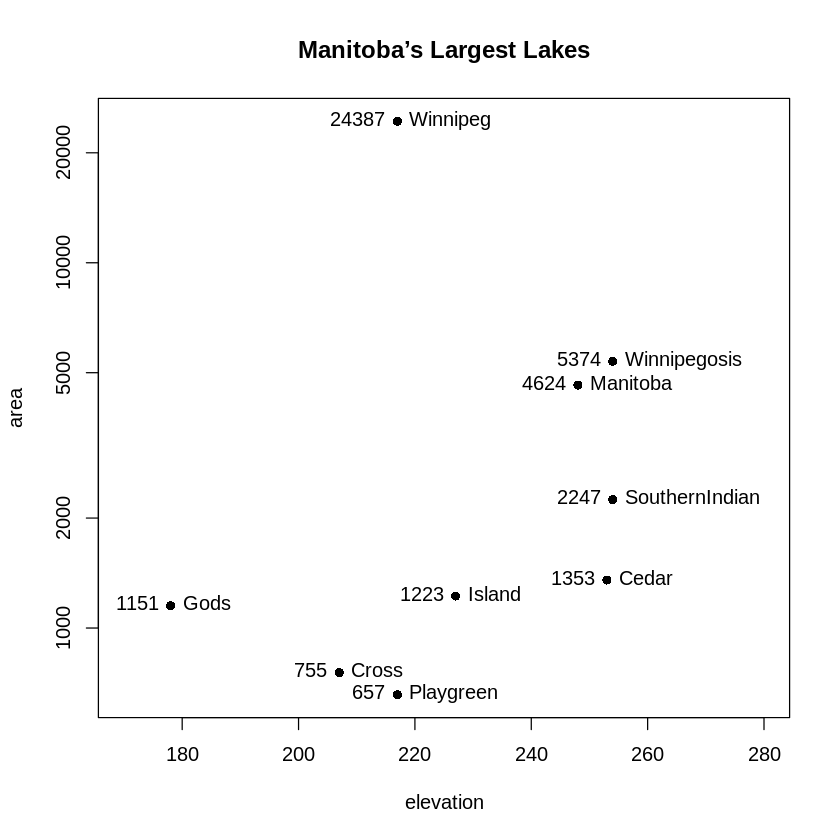

In [10]:
attach(Manitoba.lakes)
plot(area ~ elevation, pch=16, xlim=c(170,280), log="y")
# NB: Doubling the area increases log2(area) by 1.0
text(area ~ elevation, labels=row.names(Manitoba.lakes), pos=4)
text(area ~ elevation, labels=area, pos=2) 
title("Manitoba’s Largest Lakes")
detach(Manitoba.lakes)

## Exercise 11

Run the following code. Explain the output from the successive uses of table().

In [1]:
gender <- factor(c(rep("female", 91), rep("male", 92)))
table(gender)
gender <- factor(gender, levels=c("male", "female"))
table(gender)
gender <- factor(gender, levels=c("Male", "female"))
# Note the mistake: "Male" should be "male"
table(gender)
table(gender, exclude=NULL)
rm(gender)
# Remove gender

gender
female   male 
    91     92 

gender
  male female 
    92     91 

gender
  Male female 
     0     91 

gender
  Male female   <NA> 
     0     91     92 

Annotated code:

create a factor array with 91 repetitions of string "female" and 92 repetitions of string "male")

```
gender <- factor(c(rep("female", 91), rep("male", 92)))
```


output a table from the factor array:

```
table(gender)
```


modify our factor array, specifying that the levels of the factor are respectively "male" or "female", then output a table:

```
gender <- factor(gender, levels=c("male", "female"))
table(gender)
```

The table is correct because the labels are correctly recognized. Instead, with


```
gender <- factor(gender, levels=c("Male", "female"))
table(gender)
```

the label "Male" (that is different from "male", because R is case-sensitive) is not recognized, hence the count are, correctly, zero. The error is seen more clearly with 

```
table(gender, exclude=NULL)
rm(gender)
```
When asked to exclude unrecognized values, R specify that, for all the occurences of "male" label, NA is assigned.

## Exercise 12

Write a function that calculates the proportion of values in a vector x that exceed some value
cutoff.

In [83]:
thres <- function (x, threshold) {
    length(which(x>threshold))/length(array(x))
}

(a) Use the sequence of numbers 1, 2, . . . , 100 to check that this function gives the result that
is expected.



In [84]:
a = (1:100)
thres(a,40)  #expected 0.6

[1] 0.6

(b) Obtain the vector ex01.36 from the Devore6 (or Devore7) package. These data give
the times required for individuals to escape from an oil platform during a drill. Use
dotplot() to show the distribution of times. Calculate the proportion of escape times
that exceed 7 minutes.

In [66]:
library("DAAG")
install.packages("Devore7")
library("Devore7")

Installing package into ‘/home/andrea/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)


In [103]:
data <- unlist(array(ex01.36), use.names=FALSE)

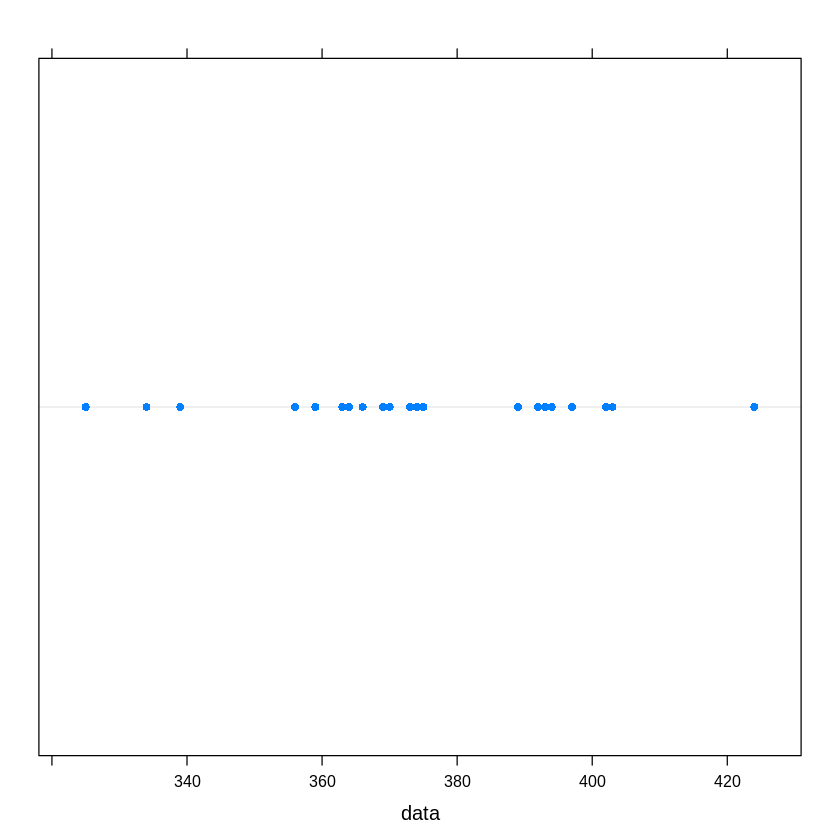

In [109]:
dotplot(data)


In [107]:
thres(data,420)   #  % if time is more than 7 minutes

[1] 0.03846154

## Exercise 13

The following plots four different transformations of the `Animals` data from the `MASS` package.
What different aspects of the data do these different graphs emphasize? Consider the effect on
low values of the variables, as contrasted with the effect on high values.

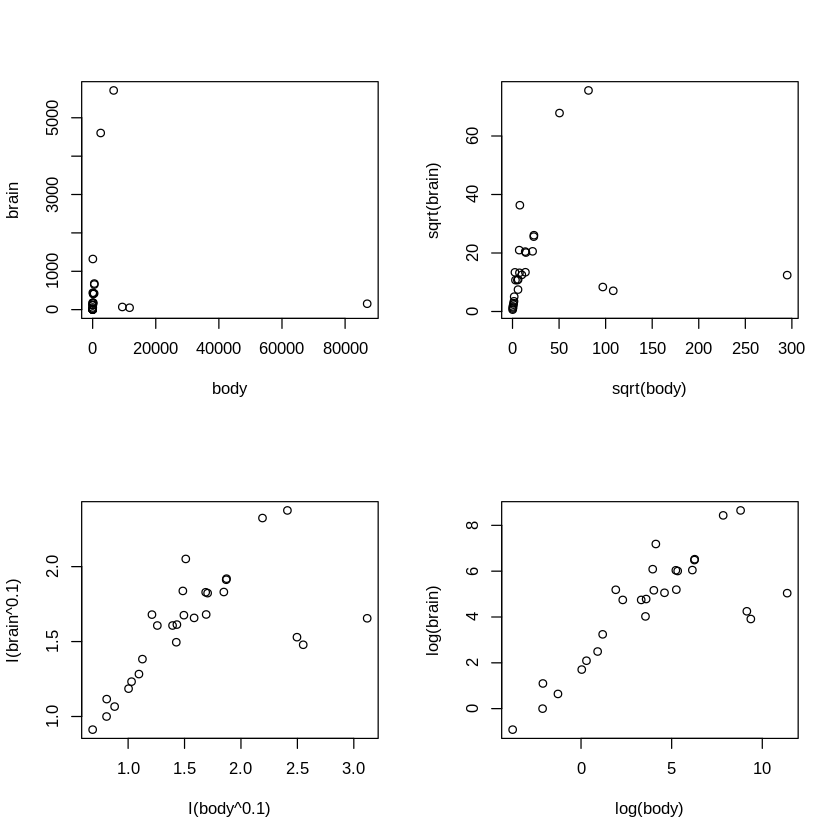

In [112]:
par(mfrow=c(2,2))
# 2 by 2 layout on the page
library(MASS)
# Animals is in the MASS package
plot(brain~body, data=Animals)
plot(sqrt(brain)~sqrt(body), data=Animals)
plot(I(brain^0.1)~I(body^0.1), data=Animals)
# I() forces its argument to be treated "as is"
plot(log(brain)~log(body), data=Animals)
par(mfrow=c(1,1))
# Restore to 1 figure per page

Graph 1 could be useful to assess the range of both variables, even if it cannot give an useful view of their eventual correlation. It can be seen that there is no direct linear correlation between variables. Outsiders are evident in this graph: animals with either very large body mass and small brain (lower right) or small body mass and large brains (probably data science students) on higher left.

Graph 2 uses square roots. Given that data (brain and body mass) both are supposed to scale with the third power of ody length in animals, squaring the values could be a first step to identify linear correlations. Rooting start canceling the effect of ousiders, and, with respect to the first graph, data points appear to move towards the center.

Graph 3 pushes this effect even more, elevating the data to the 1/10th power, but data are still very aggregated near the origin. 

Graph 4 finally solves the issue using log scale for both axes.

Which is better? It depends. Graph 1 is better to catch variable range at first sigh, while graphs 3 and 4 help noticing a correlation between variables, that is masked by heavy compression near the origin in the first graphs.

## Exercise 15

The data frame socsupport (DAAG) has data from a survey on social and other kinds of
support, for a group of university students. It includes Beck Depression Inventory (BDI) scores.
The following are two alternative plots of BDI against age:
```
plot(BDI  ̃ age, data=socsupport)
plot(BDI  ̃ unclass(age), data=socsupport)
```
For examination of cases where the score seems very high, which plot is more useful? Explain.
Why is it necessary to be cautious in making anything of the plots for students in the three oldest
age categories (25-30, 31-40, 40+)?

In [1]:
library("DAAG")

Loading required package: lattice


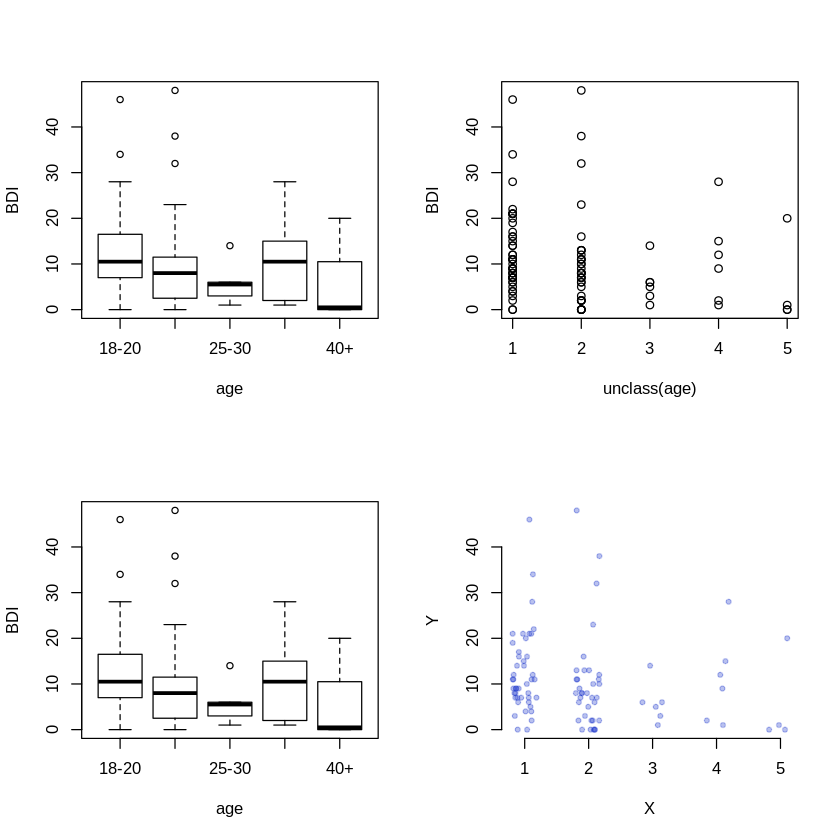

In [19]:
par(mfrow=c(2,2))
plot(BDI~age, data=socsupport)
plot(BDI~unclass(age), data=socsupport)

#modified graphs
plot(BDI~age, data=socsupport)
plot(BDI~ jitter(unclass(age)) , data=socsupport, pch=20, col=rgb(0.1, 0.2, 0.8, 0.3) , xlab="X", ylab="Y", bty="n" )
par(mfrow=c(1,1))

The first graph is as boxplot, the second one is a dotplot, showing the incidence of depression in classes of people, divided by age class. BDI (Beck Depression Inventory) is a test used to self-assess depression incidence. Results are read in bins:

```
BDI < 10 : no depression
10 < BDI < 19 : traces of slight depression
20 < BDI < 29 : traces of moderate depression
BDI > 30 : traces of severe depression
```

Boxplot graph reveals that there are 6 outsiders, mostly concentrated in younger age classes.

It would be dangerous to infer hypotheses on the oldest age classes, because the second graph reveals that there are just 6 and 4 data points for the last age classes. To have a clearer view of that, in the fourth graph I added some jittering and an alpha to the color of the dots.


## Exercise 17

Given a vector x, the following demonstrates alternative ways to create a vector of numbers
from 1 through n, where n is the length of the vector:
```
x <- c(8, 54, 534, 1630, 6611)
seq(1, length(x))
seq(along=x)
```

Now set `x <- NULL` and repeat each of the calculations `seq(1, length(x))` and `seq(along=x)`. Which version of the calculation should be used in order to return a vector of length 0 in the event that the supplied argument is NULL.

In [12]:
x <- NULL
seq(1, length(x))
seq(along=x)
seq_along(x)

[1] 1 0

integer(0)

integer(0)

The latter, discovered by the good old empirical way. The first command return a `c(1,0)` vector, in case of NULL vector. The second returns NULL. For the latter output one could use `seq_along(x)`, despite the chaotic similarity with other syntaxes.


## Exercise 20

The help page for iris (type help(iris)) gives code that converts the data in
iris3 (datasets package) to case-by-variable format, with column names “Sepal.Length”,“Sepal.Width”, “Petal.Length”, “Petal.Width”, and “Species”. Look up the help pages for the
functions that are used, and make sure that you understand them. Then add annotation to this
code that explains each step in the computation.

In [13]:
help(iris)

In [19]:
#retrieve the dimension names from iris3 dataset.
# a list of 3 elements is returned:

# NULL
# 'Sepal L.' 'Sepal W.' 'Petal L.' 'Petal W.' 
# 'Setosa' 'Versicolor' 'Virginica

dni3 <- dimnames(iris3) 

#creates a new dataframe from a matrix created by transforming the original matrix over 4 columns, 
ii <- data.frame(matrix(aperm(iris3, c(1,3,2)), ncol = 4,   #use first, third and second dimension respectively, output will have 4 columns
                        dimnames = list(NULL, sub(" L.",".Length",  #get the dimension names from dni3 variable (see above)
                                        sub(" W.",".Width", dni3[[2]])))),
    Species = gl(3, 50, labels = sub("S", "s", sub("V", "v", dni3[[3]])))) #get species name from the third list in dni3
all.equal(ii, iris) # check if the transformed dataframe's elements are identical to iris dataframe

[1] TRUE